##Importing the libraries

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import cv2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

##Defining the model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 50, 50, 128)     

In [ ]:
ImageGen = ImageDataGenerator(rescale=1.0/255.0)
test_set = ImageGen.flow_from_directory('Dataset/Test',class_mode = 'binary', batch_size = 64,target_size = (200, 200))
train_set = ImageGen.flow_from_directory('Dataset/Train',class_mode = 'binary', batch_size = 64,target_size = (200, 200))

Found 2000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Training the model

In [ ]:
history = model.fit(train_set, steps_per_epoch=len(train_set),
		validation_data=test_set, validation_steps=len(test_set), epochs=5)

Epoch 1/5
157/157 [==============================] - 838s 5s/step - loss: 0.5099 - accuracy: 0.7496 - val_loss: 0.6179 - val_accuracy: 0.6340
Epoch 2/5
157/157 [==============================] - 807s 5s/step - loss: 0.4690 - accuracy: 0.7856 - val_loss: 0.5856 - val_accuracy: 0.6765
Epoch 3/5
157/157 [==============================] - 820s 5s/step - loss: 0.4516 - accuracy: 0.7943 - val_loss: 0.5520 - val_accuracy: 0.7015
Epoch 4/5
157/157 [==============================] - 805s 5s/step - loss: 0.4251 - accuracy: 0.8087 - val_loss: 0.4804 - val_accuracy: 0.7870
Epoch 5/5
157/157 [==============================] - 802s 5s/step - loss: 0.4116 - accuracy: 0.8205 - val_loss: 0.4806 - val_accuracy: 0.7775


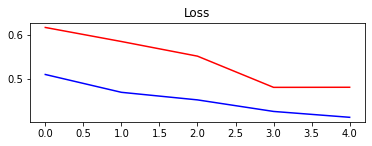

In [ ]:
 # PLotting loss
 plt.subplot(211)
 plt.title('Loss')
 plt.plot(history.history['loss'],color = 'blue',label = 'train')
 plt.plot(history.history['val_loss'],color = 'red',label = 'test') 

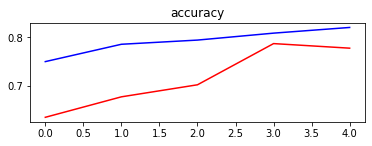

In [ ]:
 # Plotting accuracy
 plt.subplot(212)
 plt.title('accuracy')
 plt.plot(history.history['accuracy'],color = 'blue',label = 'train')
 plt.plot(history.history['val_accuracy'],color = 'red',label = 'test')

In [ ]:
!wget -O Truck.png https://media.istockphoto.com/photos/long-haul-semi-truck-on-a-rural-western-usa-interstate-highway-picture-id1156528620?k=6&m=1156528620&s=612x612&w=0&h=eYx9HanOU8OihHYHezQTcPxjbe3hB6-MfgQ4RjYHWaY= 

--2021-08-08 09:34:57--  https://media.istockphoto.com/photos/long-haul-semi-truck-on-a-rural-western-usa-interstate-highway-picture-id1156528620?k=6
Resolving media.istockphoto.com (media.istockphoto.com)... 13.224.7.43, 13.224.7.54, 13.224.7.9, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.224.7.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281666 (275K) [image/jpeg]
Saving to: ‘Truck.png’

Truck.png           100%[===================>] 275.06K  --.-KB/s    in 0.02s   

2021-08-08 09:34:57 (12.1 MB/s) - ‘Truck.png’ saved [281666/281666]



In [ ]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
photo = load_img('Truck.png', target_size=(200, 200))
predict_modified = img_to_array(photo)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = model.predict(predict_modified)
"Truck" if result > 0.5 else "Ship"

'Truck'

In [ ]:
# Saving the model
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
!zip -r /content/file.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 92%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 66%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 33%)
  adding: content/model/saved_model.pb (deflated 89%)


## Using Tranfer Learning 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = VGG16(include_top=False,input_shape=(224,224,3))
for layer in model.layers:
  layer.trainable = False
flat_1 = Flatten()(model.layers[-1].output)
class_1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(flat_1)
output = Dense(1,activation = 'sigmoid')(class_1)
model = Model(inputs = model.inputs,outputs=output)
opt = SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [4]:
!unzip Dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000001.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000006.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000015.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000030.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000042.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000063.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000068.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000074.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000075.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000076.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000079.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000080.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000083.png  
 extracting: Dataset/Train/Truck/aerial_ladder_truck_s_000087.png

In [5]:
ImageGen = ImageDataGenerator(rescale=1.0/255.0)
test_set = ImageGen.flow_from_directory('Dataset/Test',class_mode = 'binary', batch_size = 64,target_size = (224, 224))
train_set = ImageGen.flow_from_directory('Dataset/Train',class_mode = 'binary', batch_size = 64,target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [6]:
history = model.fit(train_set,steps_per_epoch=len(train_set),validation_data=test_set,validation_steps=len(test_set),epochs=10)

Epoch 1/10
157/157 [==============================] - 101s 322ms/step - loss: 0.4511 - accuracy: 0.7619 - val_loss: 0.2125 - val_accuracy: 0.9255
Epoch 2/10
157/157 [==============================] - 50s 319ms/step - loss: 0.2414 - accuracy: 0.8973 - val_loss: 0.1797 - val_accuracy: 0.9350
Epoch 3/10
157/157 [==============================] - 49s 312ms/step - loss: 0.2051 - accuracy: 0.9154 - val_loss: 0.2311 - val_accuracy: 0.9060
Epoch 4/10
157/157 [==============================] - 49s 314ms/step - loss: 0.1725 - accuracy: 0.9313 - val_loss: 0.1541 - val_accuracy: 0.9425
Epoch 5/10
157/157 [==============================] - 49s 315ms/step - loss: 0.1451 - accuracy: 0.9447 - val_loss: 0.1508 - val_accuracy: 0.9425
Epoch 6/10
157/157 [==============================] - 49s 315ms/step - loss: 0.1435 - accuracy: 0.9407 - val_loss: 0.1714 - val_accuracy: 0.9410
Epoch 7/10
157/157 [==============================] - 49s 314ms/step - loss: 0.1338 - accuracy: 0.9491 - val_loss: 0.2062 - val_a

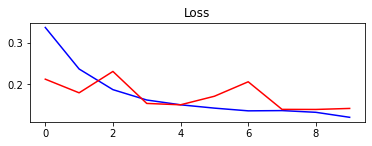

In [7]:
 # PLotting loss
 plt.subplot(211)
 plt.title('Loss')
 plt.plot(history.history['loss'],color = 'blue',label = 'train')
 plt.plot(history.history['val_loss'],color = 'red',label = 'test') 

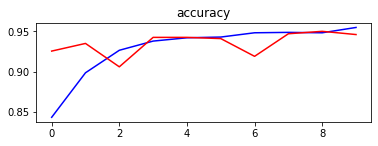

In [8]:
 # Plotting accuracy
 plt.subplot(212)
 plt.title('accuracy')
 plt.plot(history.history['accuracy'],color = 'blue',label = 'train')
 plt.plot(history.history['val_accuracy'],color = 'red',label = 'test')

In [9]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [10]:
ls

Dataset/  Dataset.zip  model/  sample_data/


In [11]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 95%)
  adding: content/model/saved_model.pb (deflated 91%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 67%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 13%)


In [12]:
!wget -O Truck.png https://media.istockphoto.com/photos/long-haul-semi-truck-on-a-rural-western-usa-interstate-highway-picture-id1156528620?k=6&m=1156528620&s=612x612&w=0&h=eYx9HanOU8OihHYHezQTcPxjbe3hB6-MfgQ4RjYHWaY= 

--2021-08-09 05:46:33--  https://media.istockphoto.com/photos/long-haul-semi-truck-on-a-rural-western-usa-interstate-highway-picture-id1156528620?k=6
Resolving media.istockphoto.com (media.istockphoto.com)... 13.224.7.54, 13.224.7.9, 13.224.7.47, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.224.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281666 (275K) [image/jpeg]
Saving to: ‘Truck.png’

Truck.png           100%[===================>] 275.06K  --.-KB/s    in 0.02s   

2021-08-09 05:46:34 (12.8 MB/s) - ‘Truck.png’ saved [281666/281666]



In [19]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
photo = load_img('ship.jpg', target_size=(224, 224))
predict_modified = img_to_array(photo)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = model.predict(predict_modified)
print(result)
"Truck" if result > 0.5 else "Ship"

[[9.637902e-05]]


'Ship'

In [18]:
!wget -O ship.jpg https://www.seatrade-cruise.com/sites/seatrade-cruise.com/files/styles/article_featured_retina/public/CRUISE_Charming.jpg?itok=i-7jNq8K

--2021-08-09 05:49:09--  https://www.seatrade-cruise.com/sites/seatrade-cruise.com/files/styles/article_featured_retina/public/CRUISE_Charming.jpg?itok=i-7jNq8K
Resolving www.seatrade-cruise.com (www.seatrade-cruise.com)... 172.67.69.185, 104.26.15.176, 104.26.14.176
Connecting to www.seatrade-cruise.com (www.seatrade-cruise.com)|172.67.69.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145779 (142K) [image/jpeg]
Saving to: ‘ship.jpg’

ship.jpg            100%[===================>] 142.36K   643KB/s    in 0.2s    

2021-08-09 05:49:10 (643 KB/s) - ‘ship.jpg’ saved [145779/145779]

